# Linear Bootstrap for Interpolation

In [35]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib notebook

In [59]:
val_date = datetime(2017, 6, 30)

In [72]:
clean_label = lambda label: int(re.findall("-[0-9]{2,}D-", label)[0][1:-2])
total_day_shift = lambda label: 1 if "O/N" in label else clean_label(label)

def weekday_shift(date):
    weekday = date.weekday()
    if 0 <= weekday <= 4:
        return date
    elif weekday == 5:
        return date + timedelta(2)
    else:
        return date + timedelta(1)
    
parse_tiie28 = lambda date_shift: val_date + timedelta(total_day_shift(date_shift))

In [76]:
tiie28 = pd.read_table("tiie28.txt", names=["Label", "Rate"])
tiie28.index = tiie28.Label.apply(parse_tiie28)

In [77]:
tiie28

,Label,Rate
Label,,
2017-07-01,DEPO-MXN-FIX-O/N-,7.110
2017-07-28,SWAP-MXN-MXNTIIE28D-28D-,7.365
2017-09-22,SWAP-MXN-MXNTIIE28D-84D-,7.370
2017-12-15,SWAP-MXN-MXNTIIE28D-168D-,7.375
2018-03-09,SWAP-MXN-MXNTIIE28D-252D-,7.325
2018-06-29,SWAP-MXN-MXNTIIE28D-364D-,7.200
2019-06-28,SWAP-MXN-MXNTIIE28D-728D-,6.880
2020-06-26,SWAP-MXN-MXNTIIE28D-1092D-,6.740
2021-06-25,SWAP-MXN-MXNTIIE28D-1456D-,6.755


<IPython.core.display.Javascript object>


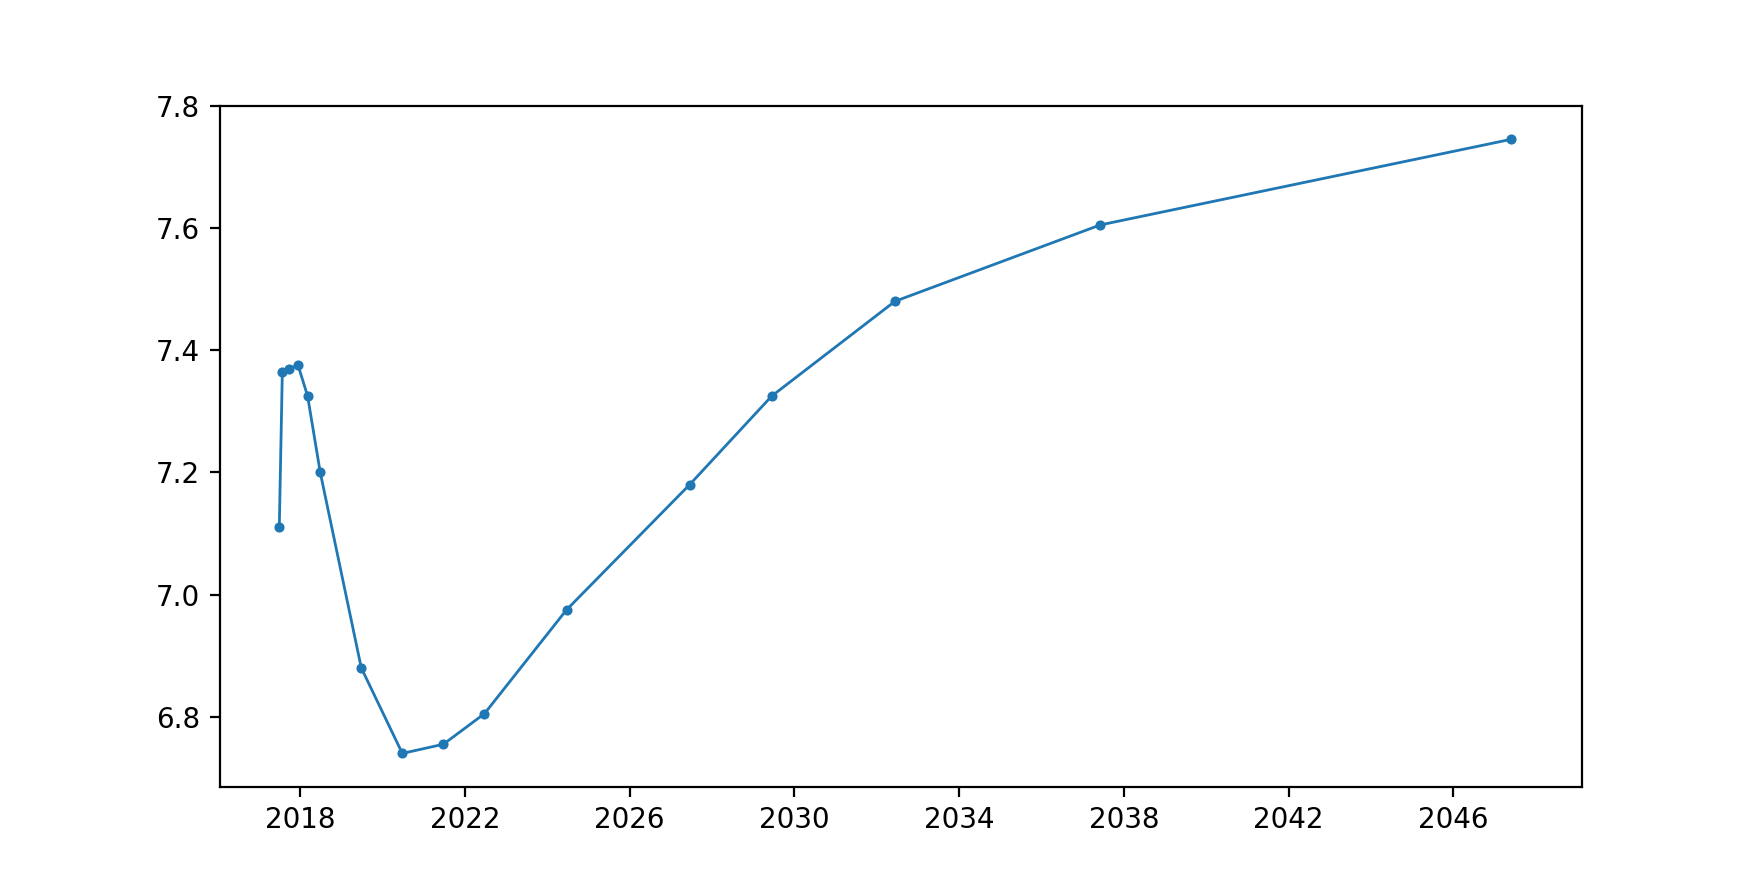

In [83]:
plt.plot(tiie28.index, tiie28.Rate, linewidth=1)
plt.scatter(tiie28.index, tiie28.Rate, s=7)